In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [3]:
kashti = sns.load_dataset('titanic')

In [4]:
kashti.to_csv('kashti.csv')

In [5]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
ks1=kashti

In [7]:
# To check type of data set from first 5 rows
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Will tell us total number of rows and column
ks.shape

(891, 15)

In [9]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
# Column Names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
ks['sex'].unique()

array(['male', 'female'], dtype=object)

# Cleaning and filtering the data

In [13]:
# find missing values inside
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
#To drop deck value from colomn (cleaning data)
ks_clean = ks.drop(['deck'], axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
ks_clean.shape

(891, 14)

In [17]:
ks_clean = ks_clean.dropna()

In [18]:
ks_clean.shape

(712, 14)

In [19]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
ks_clean.shape

(712, 14)

In [21]:
ks.shift

<bound method DataFrame.shift of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_

In [22]:
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [23]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#After cleaning out of range data losted
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [25]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

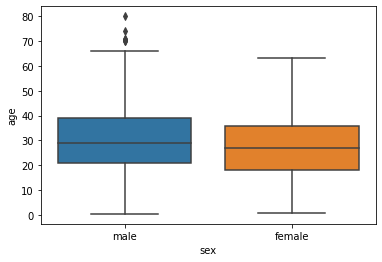

In [26]:
sns.boxplot(x= 'sex', y='age', data=ks_clean)

<AxesSubplot:ylabel='age'>

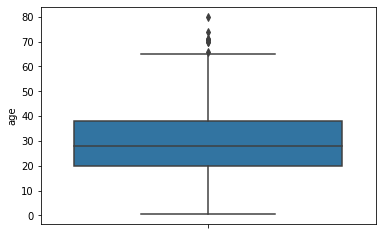

In [27]:
sns.boxplot(y='age', data=ks_clean)

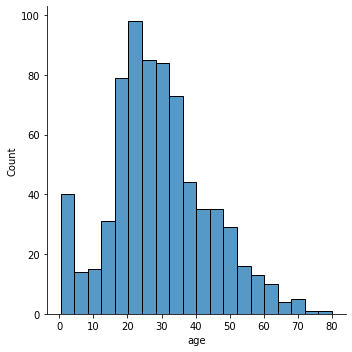

In [28]:
#To remove above outliers
sns.displot(ks_clean['age'])

In [29]:
ks_clean['age'].mean()
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [30]:
ks_clean = ks_clean[ks_clean['age']<68]
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [31]:
ks_clean.shape

(705, 14)

In [32]:
ks_clean['age'].mean()

29.21797163120567

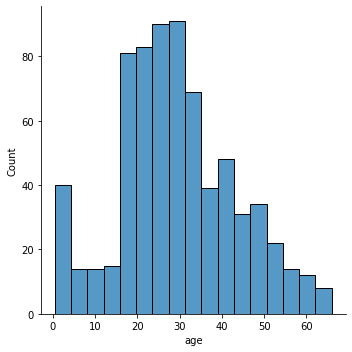

In [33]:
sns.displot(ks_clean['age'])

<AxesSubplot:ylabel='age'>

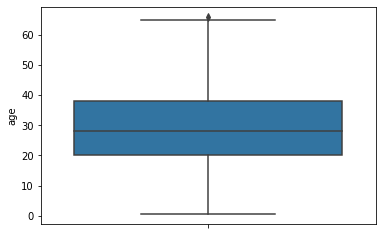

In [34]:
sns.boxplot(y='age', data=ks_clean)

In [35]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

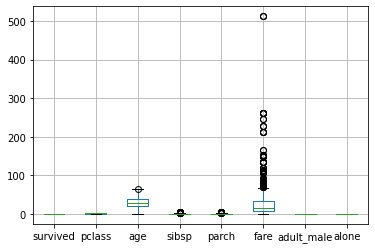

In [36]:
ks_clean.boxplot()

<AxesSubplot:>

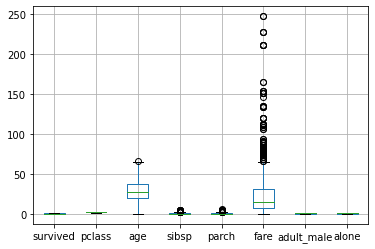

In [41]:
ks_clean = ks_clean[ks_clean['fare']<300]
ks_clean.boxplot()

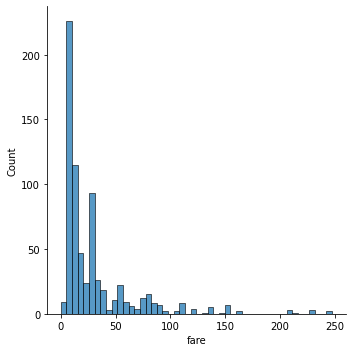

In [42]:
sns.displot(ks_clean['fare'])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

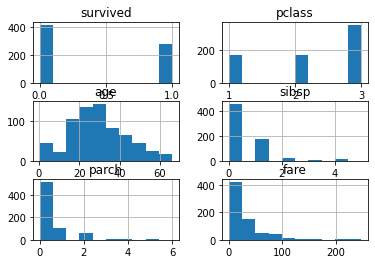

In [44]:
ks_clean.hist()

<AxesSubplot:>

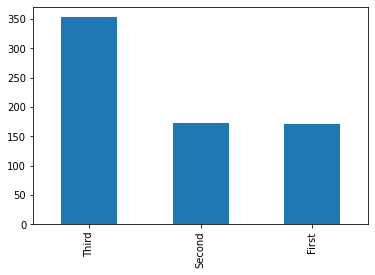

In [49]:
pd.value_counts(ks_clean['class']).plot.bar()

In [50]:
ks_clean.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch       fare  \
sex    class                                                                
female First   0.961538     1.0  34.884615  0.461538  0.435897  95.543003   
       Second  0.918919     2.0  28.722973  0.500000  0.621622  21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980  15.875369   
male   First   0.397849     1.0  40.036774  0.354839  0.279570  58.597894   
       Second  0.153061     2.0  30.340102  0.377551  0.244898  21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964  12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.371795  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.967742  0.537634  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

In [53]:
ks1.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

 Relationship

In [55]:
cor_ks_clean = ks_clean.corr()

<AxesSubplot:>

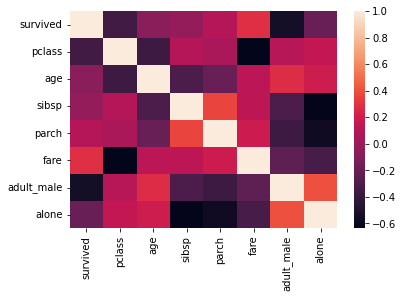

In [56]:
sns.heatmap(cor_ks_clean)

<AxesSubplot:>

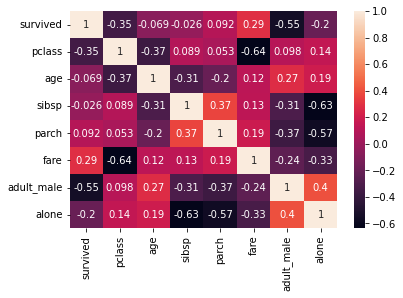

In [57]:
sns.heatmap(cor_ks_clean, annot=True)

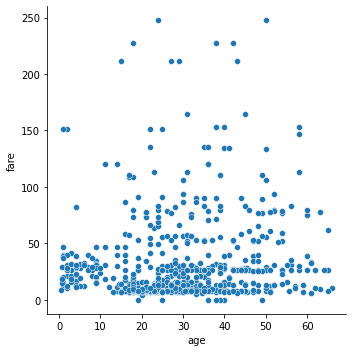

In [58]:
sns.relplot(x= 'age', y= 'fare', data=ks_clean)

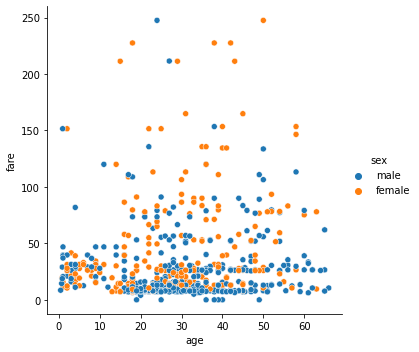

In [60]:
sns.relplot(x= 'age', y= 'fare',hue='sex', data=ks_clean)

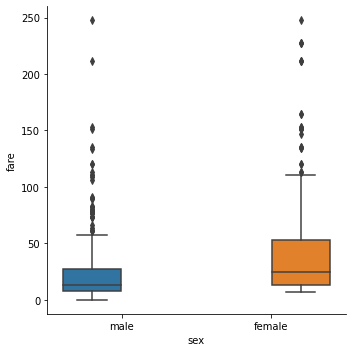

In [62]:
sns.catplot(x= 'sex', y= 'fare',hue='sex', data=ks_clean, kind='box')